
<div class="alert alert-info" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>1.4. Location or Size: What Influences House Prices in Mexico?</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo

You've wrangled the data, you've gained an understanding of its basic characteristics in your EDA, and now it's time to ask some research questions. 

# Import Data

**Task 1.4.1:** Read the CSV file that you created in the last notebook (`"data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

- [What's a DataFrame?](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [What's a CSV file?](../%40textbook/03-pandas-getting-started.ipynb#CSV-Files)
- [Read a CSV file into a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("data/mexico-real-estate-clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

We know in which state each house is located thanks to the `"state"` column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group. 

In [ ]:
VimeoVideo("656378731", h="8daa35d1e8", width=600)

**Task 1.4.2:** Use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 

- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data using the `groupby` method in pandas.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)

In [5]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state").agg(
    {
        'price_usd': 'mean'
    }
).sort_values(by="price_usd", ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.frame.DataFrame'>
mean_price_by_state shape: (29, 1)


,price_usd
state,
Querétaro,141521.234307
Guanajuato,138934.256000
Distrito Federal,137953.803815
Chihuahua,132085.371974
Quintana Roo,130142.435916


In [ ]:
VimeoVideo("656378435", h="b3765f3339", width=600)

**Task 1.4.3:** Use `mean_price_by_state` to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean House Price by State"`.

- [Create a bar chart using pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts) 

Text(0.5, 1.0, 'Mean House Price by State')

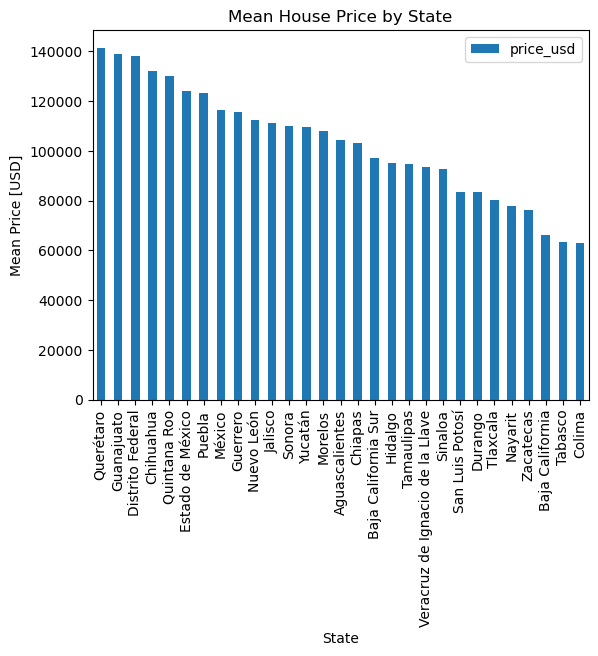

In [6]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Mean Price [USD]")
plt.title("Mean House Price by State")

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

In [ ]:
VimeoVideo("656378342", h="2f4da7f7b4", width=600)

**Task 1.4.4:** Create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 

- [Create new columns derived from existing columns in a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-Columns)

In [7]:
df.columns

Index(['property_type', 'state', 'lat', 'lon', 'area_m2', 'price_usd'], dtype='object')

In [8]:
# Create "price_per_m2" column
df["price_per_m2"] = df['price_usd'] / df['area_m2']

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


Let's redo our bar chart from above, but this time with the mean of `"price_per_m2"` for each state.

In [ ]:
VimeoVideo("656377991", h="c7319b0458", width=600)

**Task 1.4.5:** First, use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m<sup>2</sup> for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price per M^2[USD]"`, and give the chart the title `"Mean House Price per M^2 by State"`. 

- [What's a Series?](../%40textbook/05-pandas-summary-statistics.ipynb#Series)
- [Aggregate data using the `groupby` method in pandas.](../%40textbook/04-pandas-advanced.ipynb#Series-and-Groupby)
- [Create a bar chart using pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts) 

Text(0.5, 1.0, 'Mean House Price per M^2 by State')

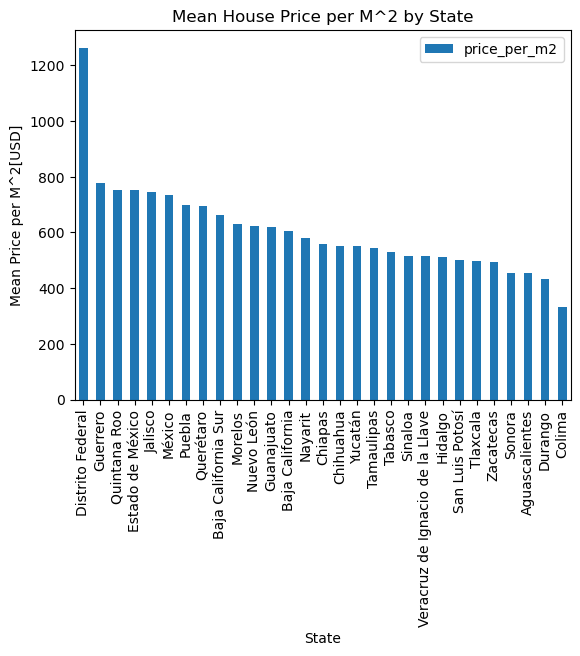

In [9]:
# Group `df` by "state", create bar chart of "price_per_m2"
df.groupby("state").agg(
    {
        'price_per_m2': 'mean'
    }
).sort_values(by="price_per_m2", ascending=False).plot(
    kind="bar"
)

plt.xlabel("State")
plt.ylabel("Mean Price per M^2[USD]")
plt.title("Mean House Price per M^2 by State")

Now we see that the capital Mexico City (*Distrito Federal*) is by far the most expensive market.  Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

# Research Question 2

**Is there a relationship between home size and price?**

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

In [ ]:
VimeoVideo("656377758", h="62546c7b86", width=600)

**Task 1.4.6:** Create a scatter plot from `df` that represents price as a function of size. In other words, `"area_m2"` should be on the x-axis, and `"price_usd"` should be on the y-axis. Be sure to use expressive axis labels (`"Area [sq meters]"` and `"Price [USD]"`, respectively).

- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [What's correlation?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

Text(0.5, 1.0, 'plot of price_usd vs area_m2')

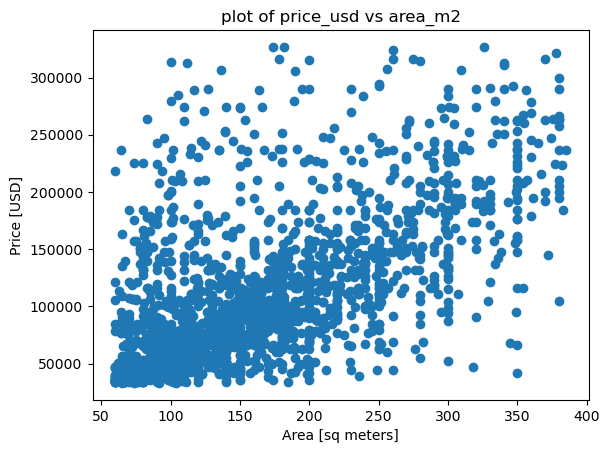

In [10]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(df["area_m2"], df["price_usd"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("plot of price_usd vs area_m2")

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation? 

In [ ]:
VimeoVideo("656377616", h="8d3b060e71", width=600)

**Task 1.4.7:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`. 

- [What's a correlation coefficient?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)

In [12]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df[["price_usd", "area_m2"]].corr()

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico):            price_usd   area_m2
price_usd   1.000000  0.585518
area_m2     0.585518  1.000000


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [ ]:
VimeoVideo("656377515", h="d2478d38df", width=600)

**Task 1.4.8:** Create a new DataFrame named `df_morelos`. It should include all the houses from `df` that are in the state of Morelos.

- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

In [13]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df['state'] == "Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (97, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


In [ ]:
VimeoVideo("656377395", h="bd93b05ff9", width=600)

**Task 1.4.9:** Using `df_morelos`, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. The title should be `"Morelos: Price vs. Area"`.

- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

Text(0.5, 1.0, 'Morelos: Price vs. Area')

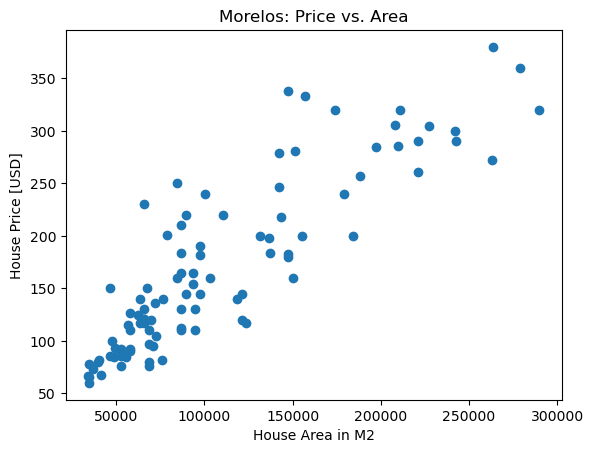

In [14]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(df_morelos['price_usd'], df_morelos['area_m2'])

# Add x-axis label
plt.xlabel('House Area in M2')

# Add y-axis label
plt.ylabel('House Price [USD]')

# Add title
plt.title("Morelos: Price vs. Area")

Wow! It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [ ]:
VimeoVideo("656377340", h="664cb44291", width=600)

**Task 1.4.10:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"` in `df_morelos`. 

- [What's a correlation coefficient?](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

In [15]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos[['price_usd', 'area_m2']].corr()

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos):            price_usd   area_m2
price_usd   1.000000  0.872566
area_m2     0.872566  1.000000


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos. 

To conclude, let's look at the capital Mexico City (*Distrito Federal*).  

In [ ]:
VimeoVideo("656376911", h="19666a4c87", width=600)

**Task 1.4.11:** First, create a new DataFrame called `df_mexico_city` that includes all the observations from `df` that are part of the *Distrito Federal*. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title `"Mexico City: Price vs. Area"`. Finally, calculate the  correlation coefficient for `"area_m2"` and `"price_usd"` in `df_mexico_city`.

- [Calculate the correlation coefficient for two Series using pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Correlations)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (582, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City):            price_usd   area_m2
price_usd   1.000000  0.648293
area_m2     0.648293  1.000000


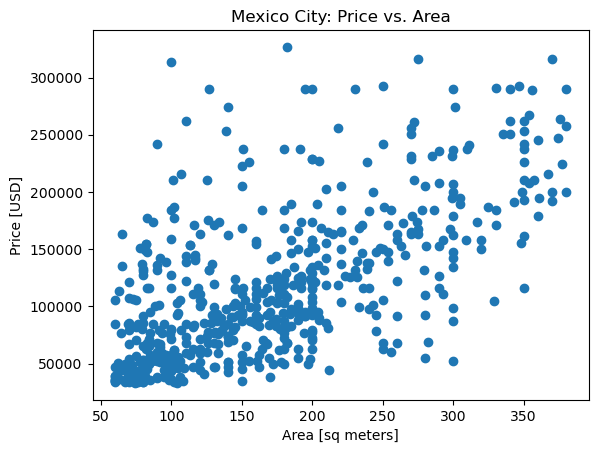

In [20]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df['state'] == "México"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  # REMOVERHS

# Add x-axis label
plt.xlabel("Area [sq meters]")  # REMOVERHS

# Add y-axis label
plt.ylabel("Price [USD]")  # REMOVERHS

# Add title
plt.title("Mexico City: Price vs. Area")  # REMOVERHS

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city[['price_usd', 'area_m2']].corr()

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this? 

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account. 

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
